In [0]:
# Import telco.csv and do the following exercises using the Spark DataFrame API (10 points):

# 1. Create a dataframe containing 'customerID' and 'MonthlyCharges'.
# 2. Show on a pie chart the proportions of possible types of 'Contract'.
# 3. Get the number of customers that have Multiple Lines. Show the result as value of a single variable. (2 points)
# 4. What are the minimum and maximum values of tenure? (2 points)
# 5. What are the monthly charges depending on the gender of the customer?
# 6. Do customers who have a yearly contract pay on average more than the others? Return the result as a single bool variable. (2 points)
# 7. Create a column that will store the division of Total Charges by tenure

In [0]:
from pyspark.sql.functions import *
from pyspark.sql.window import Window 
import matplotlib.pyplot as plt

# File location and type
file_location = "/FileStore/tables/telco.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

In [0]:
task_1 = df \
    .select('customerID', 'MonthlyCharges') \
    .show()

+----------+--------------+
|customerID|MonthlyCharges|
+----------+--------------+
|7590-VHVEG|         29.85|
|5575-GNVDE|         56.95|
|3668-QPYBK|         53.85|
|7795-CFOCW|          42.3|
|9237-HQITU|          70.7|
|9305-CDSKC|         99.65|
|1452-KIOVK|          89.1|
|6713-OKOMC|         29.75|
|7892-POOKP|         104.8|
|6388-TABGU|         56.15|
|9763-GRSKD|         49.95|
|7469-LKBCI|         18.95|
|8091-TTVAX|        100.35|
|0280-XJGEX|         103.7|
|5129-JLPIS|         105.5|
|3655-SNQYZ|        113.25|
|8191-XWSZG|         20.65|
|9959-WOFKT|         106.7|
|4190-MFLUW|          55.2|
|4183-MYFRB|         90.05|
+----------+--------------+
only showing top 20 rows



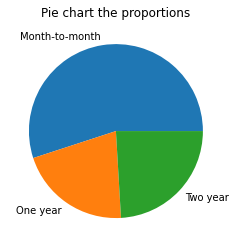

In [0]:
task_2 = df \
    .groupBy('Contract') \
    .agg(count('customerID').alias("Count")) \
    .drop('Contract')

l = [int(row["Count"]) for row in task_2.collect()]

my_labels = 'Month-to-month', 'One year', 'Two year'
plt.pie(l, labels=my_labels)
plt.title('Pie chart the proportions')
plt.show()

In [0]:
task_3 = df \
    .where('MultipleLines = "Yes"') \
    .select(count('customerID').alias("Number of customers")) \
    .show()

+-------------------+
|Number of customers|
+-------------------+
|               2971|
+-------------------+



In [0]:
task_4 = df \
    .select(max('tenure'), min('tenure')) \
    .show()

+-----------+-----------+
|max(tenure)|min(tenure)|
+-----------+-----------+
|          9|          0|
+-----------+-----------+



In [0]:
task_5 = df \
    .select('gender', 'MonthlyCharges') \
    .groupBy('gender') \
    .agg(count('MonthlyCharges').alias('MonthlyCharges')) \
    .show()

+------+--------------+
|gender|MonthlyCharges|
+------+--------------+
|Female|          3488|
|  Male|          3555|
+------+--------------+



In [0]:
task_6 = df \
    .groupBy('Contract') \
    .agg(avg('TotalCharges').alias("TotalCharges"))
    
max_value = task_6 \
    .select(max('TotalCharges').alias("TotalCharges")) \
    .first() 

task_6 = task_6 \
    .withColumn('Result',
               when((col('TotalCharges') == max_value.TotalCharges) & (col('Contract') == 'One year'), 'True')
              .otherwise('False'))

result = task_6 \
    .select(last('Result').alias("Result"))\
    .show()

+------+
|Result|
+------+
| False|
+------+



In [0]:
task_7 = df \
    .withColumn('Division', (col('TotalCharges') / col('tenure'))) \
    .select('Division') \
    .show()

+------------------+
|          Division|
+------------------+
|             29.85|
|  55.5735294117647|
|            54.075|
| 40.90555555555556|
|            75.825|
|          102.5625|
| 88.60909090909091|
|30.189999999999998|
|108.78750000000001|
| 56.25725806451613|
| 45.18846153846154|
|            20.425|
|             97.95|
|102.78163265306122|
|107.44200000000001|
|114.42246376811593|
|19.672115384615385|
|103.97535211267606|
|            52.835|
| 88.70952380952382|
+------------------+
only showing top 20 rows

